In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import BaggingClassifier



In [74]:
# Load the dataset
df= pd.read_csv('creditcard.csv')


In [75]:
# first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [77]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [78]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [79]:
# distribution of normal transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [80]:
# separating the data for analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [81]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [82]:
# statistical measures of the data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [83]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [86]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [87]:
normal_sample = normal.sample(n=492)

In [88]:
new_dataset = pd.concat([normal_sample, fraud], axis=0)

In [89]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255276,157145.0,1.042620,-3.094167,-0.296319,-0.334716,-2.115464,0.918977,-1.124422,0.285599,0.793947,...,-0.118469,-0.684290,-0.021771,0.770577,-0.944366,1.056477,-0.111422,0.040292,517.90,0
9540,14271.0,-1.032098,-0.726162,2.312770,-1.421518,-0.267646,0.431689,-0.536987,0.265324,0.194473,...,0.411927,1.159647,0.008178,-0.301384,0.096491,-0.201935,0.057549,0.106998,109.00,0
39568,39888.0,1.050731,-0.420129,0.646983,-0.056811,-0.584354,0.369985,-0.615422,0.340326,0.303879,...,0.201855,0.516437,0.002267,-0.229723,0.012712,1.111037,-0.044653,-0.000946,47.85,0
241160,150908.0,-1.351292,1.535749,-2.474230,-0.690587,-2.537770,3.783982,4.483791,-0.647680,0.429598,...,-0.031246,1.744950,-0.511179,-1.656423,-0.873657,-0.250611,-1.509812,-1.807133,806.50,0
265052,161712.0,2.055652,0.016639,-1.401155,0.167549,0.264496,-0.839214,0.214932,-0.295140,0.209477,...,0.286709,1.010751,-0.063308,-0.271620,0.314473,-0.111520,-0.017240,-0.070055,0.89,0


In [90]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [91]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [92]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95522.250000,0.024244,-0.053160,-0.014633,0.072472,-0.143413,-0.110943,0.034748,-0.077772,0.026829,...,0.019977,0.040644,-0.017816,0.006068,-0.017296,0.003125,-0.007422,-0.045975,-0.012012,106.806707
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [93]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)



            Time        V1        V2        V3        V4        V5        V6   
255276  157145.0  1.042620 -3.094167 -0.296319 -0.334716 -2.115464  0.918977  \
9540     14271.0 -1.032098 -0.726162  2.312770 -1.421518 -0.267646  0.431689   
39568    39888.0  1.050731 -0.420129  0.646983 -0.056811 -0.584354  0.369985   
241160  150908.0 -1.351292  1.535749 -2.474230 -0.690587 -2.537770  3.783982   
265052  161712.0  2.055652  0.016639 -1.401155  0.167549  0.264496 -0.839214   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [94]:
print(Y)

255276    0
9540      0
39568     0
241160    0
265052    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


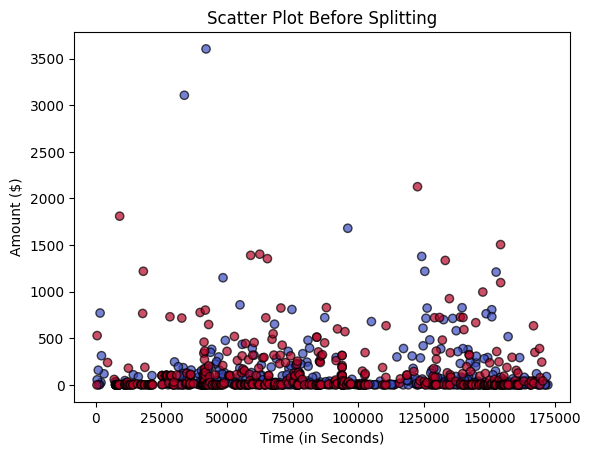

In [95]:
# Scatter plot before splitting
plt.scatter(X['Time'], X['Amount'], c=Y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Scatter Plot Before Splitting')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


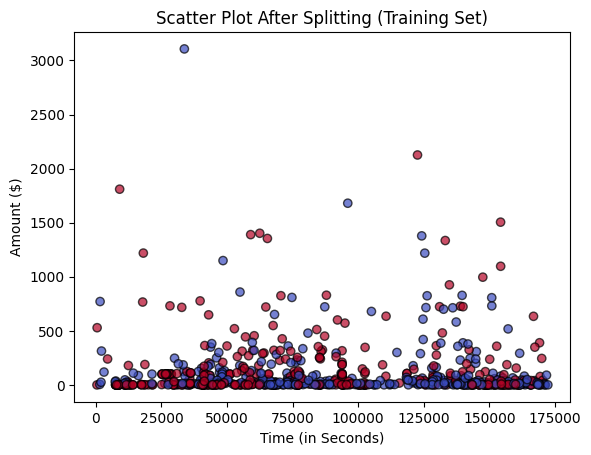

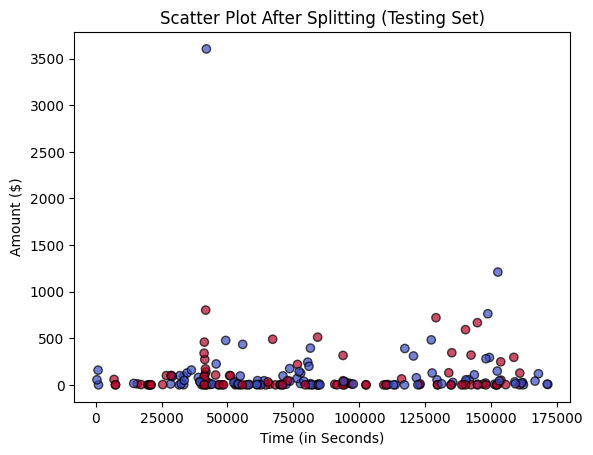

In [97]:
# Scatter plot after splitting
plt.scatter(X_train['Time'], X_train['Amount'], c=Y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Scatter Plot After Splitting (Training Set)')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()

plt.scatter(X_test['Time'], X_test['Amount'], c=Y_test, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Scatter Plot After Splitting (Testing Set)')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount ($)')
plt.show()


In [98]:


knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [99]:
knn_pred = knn_model.predict(X_test)

In [100]:
accuracy = accuracy_score(Y_test, knn_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


Confusion Matrix:
[[62 37]
 [32 66]]


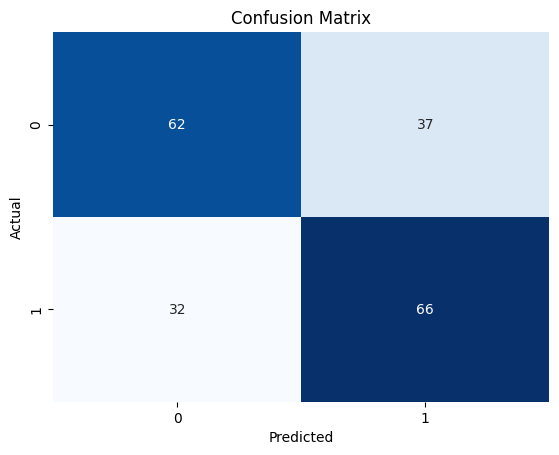

In [101]:


# Confusion matrix
conf_matrix = confusion_matrix(Y_test, knn_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [102]:


dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
tree_pred=dtree.predict(X_test)

In [103]:
accuracy_score(Y_test,tree_pred)

0.8883248730964467

Confusion Matrix:
[[87 12]
 [10 88]]


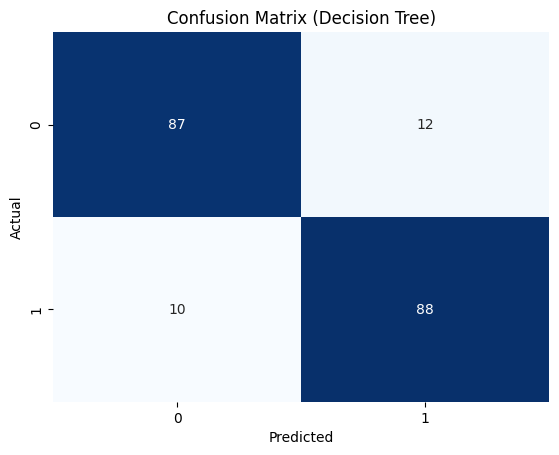

In [104]:
# Confusion matrix
conf_matrix_tree = confusion_matrix(Y_test, tree_pred)
print("Confusion Matrix:")
print(conf_matrix_tree)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

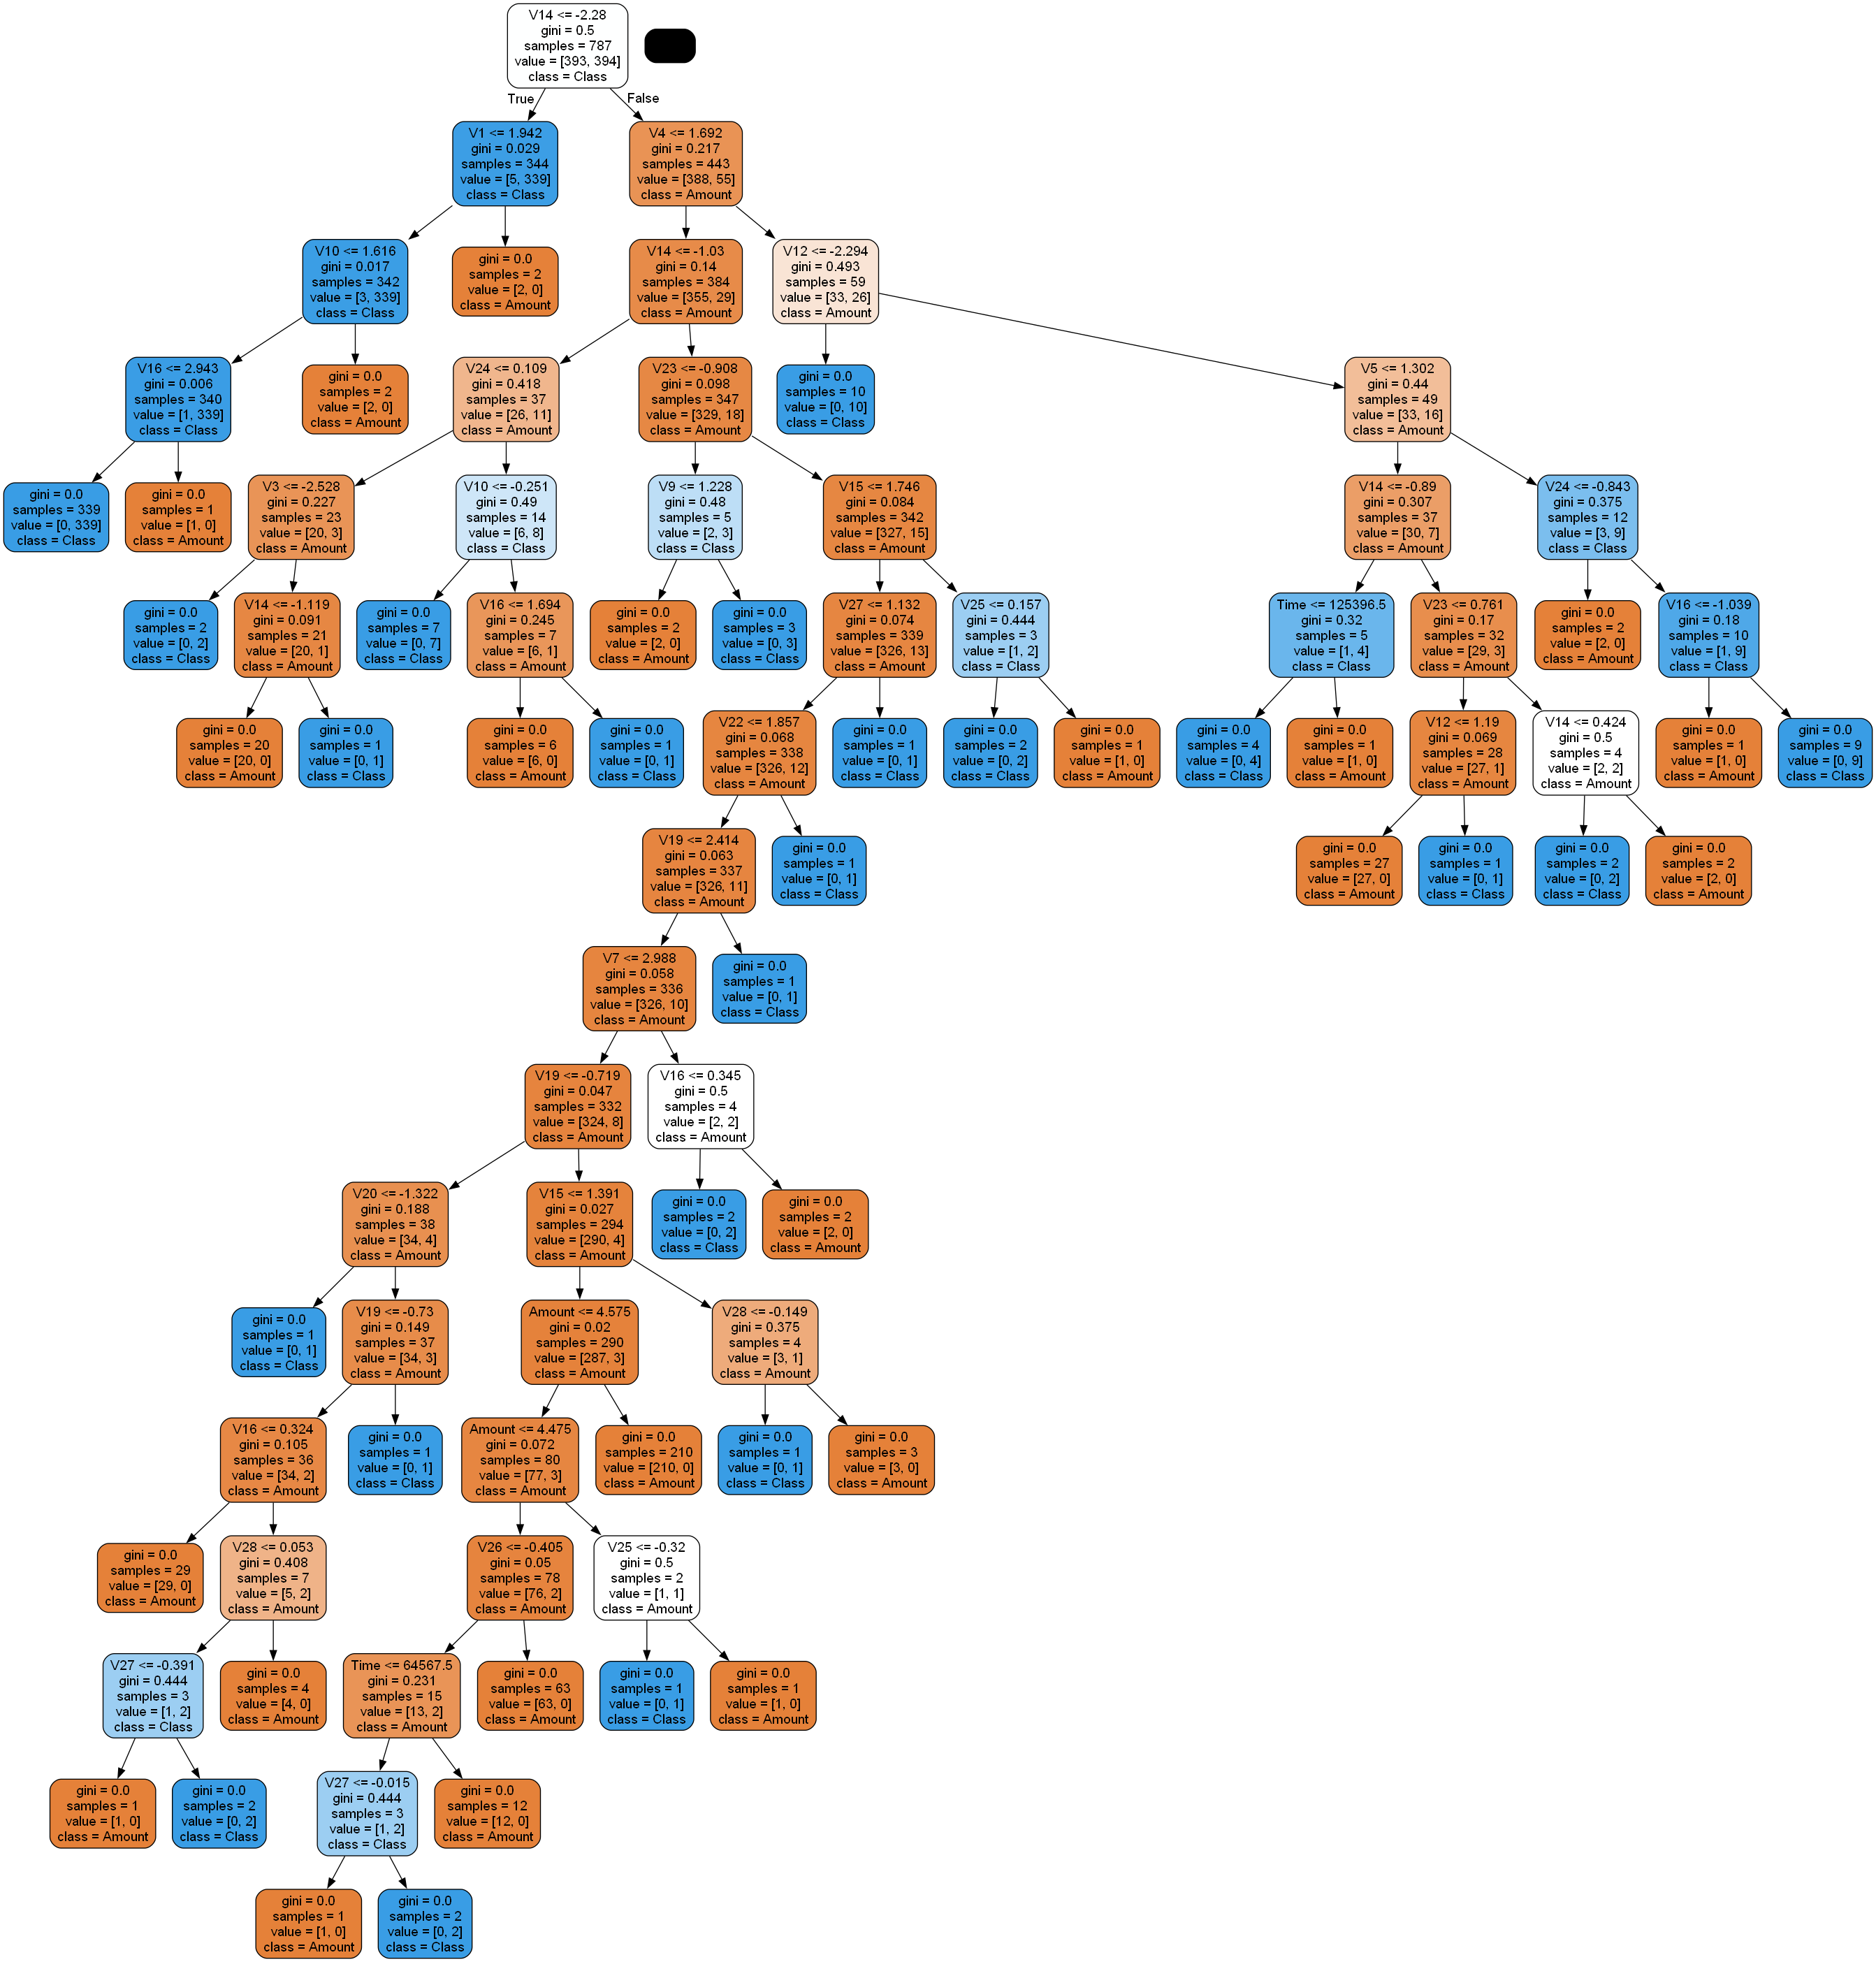

In [105]:

dot_data =StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=['Amount','Class'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())


In [106]:


# Create a BaggingClassifier with a DecisionTree base estimator
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, Y_train)

BaggingClassifier()

In [107]:
# Make predictions
bagging_pred = bagging_model.predict(X_test)

# Accuracy
accuracy_bagging = accuracy_score(Y_test, bagging_pred)
print(f"Bagging Accuracy: {accuracy_bagging:.2f}")

Bagging Accuracy: 0.91


Confusion Matrix (Bagging):
[[96  3]
 [14 84]]


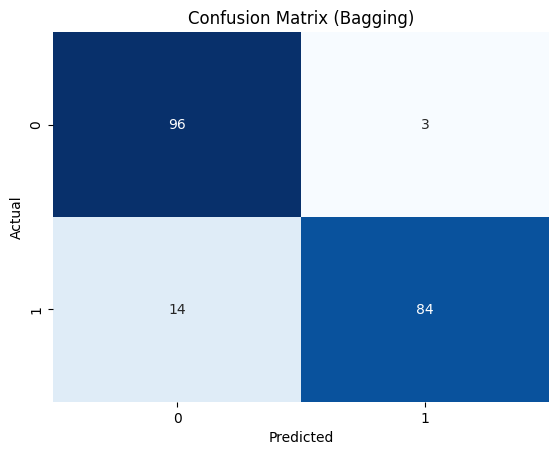

In [108]:
# Confusion matrix
conf_matrix_bagging = confusion_matrix(Y_test, bagging_pred)
print("Confusion Matrix (Bagging):")
print(conf_matrix_bagging)
# Plotting the confusion matrix for Bagging
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Bagging)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()